# Pyspark

## Pyspark Setup

In [3]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
# from pyspark.sql.functions
# import * from pyspark.sql.types 
# import * from datetime import date, timedelta, datetime
import time

In [5]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
from datetime import date, timedelta, datetime
import time

In [6]:
#Initialization of a Spark Session
sc = SparkSession.builder.appName("PySparkExample")\
    .config ("spark.sql.shuffle.partitions", "50") \
    .config("spark.driver.maxResultSize","5g") \
    .config ("spark.sql.execution.arrow.enabled", "true")\
    .getOrCreate()

21/09/16 15:08:53 WARN Utils: Your hostname, dell resolves to a loopback address: 127.0.1.1; using 192.168.0.106 instead (on interface wlp0s20f3)
21/09/16 15:08:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/09/16 15:08:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/09/16 15:08:56 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
21/09/16 15:08:56 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' 

In [35]:
df = sc.read.csv('Iris.csv',header=True)

In [36]:
# Show 10 row
df.show(3)


+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 3 rows



In [54]:
# show first 5 rows
df.head(5)

[Row(Id='1', SepalLengthCm='5.1', SepalWidthCm='3.5', PetalLengthCm='1.4', PetalWidthCm='0.2', Species='Iris-setosa'),
 Row(Id='2', SepalLengthCm='4.9', SepalWidthCm='3.0', PetalLengthCm='1.4', PetalWidthCm='0.2', Species='Iris-setosa'),
 Row(Id='3', SepalLengthCm='4.7', SepalWidthCm='3.2', PetalLengthCm='1.3', PetalWidthCm='0.2', Species='Iris-setosa'),
 Row(Id='4', SepalLengthCm='4.6', SepalWidthCm='3.1', PetalLengthCm='1.5', PetalWidthCm='0.2', Species='Iris-setosa'),
 Row(Id='5', SepalLengthCm='5.0', SepalWidthCm='3.6', PetalLengthCm='1.4', PetalWidthCm='0.2', Species='Iris-setosa')]

In [57]:
#Summaryd
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|summary|                Id|     SepalLengthCm|       SepalWidthCm|     PetalLengthCm|      PetalWidthCm|       Species|
+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|               150|                150|               150|               150|           150|
|   mean|              75.5| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|43.445367992456916|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|                 1|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|                99|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+----

21/09/16 15:23:52 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


In [60]:
#Dataframe Count
df.count()
df.distinct().count()

150

In [37]:
# Show columns
df.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [38]:
# Dataframe Schema
df.schema

StructType(List(StructField(Id,StringType,true),StructField(SepalLengthCm,StringType,true),StructField(SepalWidthCm,StringType,true),StructField(PetalLengthCm,StringType,true),StructField(PetalWidthCm,StringType,true),StructField(Species,StringType,true)))

## Pyspark base Function

In [42]:
# df.select()
df.select("Species").show(3)

+-----------+
|    Species|
+-----------+
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
+-----------+
only showing top 3 rows



In [46]:
#When Selector
df.select("Species", when(df.SepalLengthCm > 30, "big").otherwise("small")).show(5)

+-----------+------------------------------------------------------+
|    Species|CASE WHEN (SepalLengthCm > 30) THEN big ELSE small END|
+-----------+------------------------------------------------------+
|Iris-setosa|                                                 small|
|Iris-setosa|                                                 small|
|Iris-setosa|                                                 small|
|Iris-setosa|                                                 small|
|Iris-setosa|                                                 small|
+-----------+------------------------------------------------------+
only showing top 5 rows



In [53]:
#Selector similiar to pandas
df[df.Species.isin("Iris-setosa")].show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [68]:
#df repartitioning
df.repartition(10).rdd.getNumPartitions()

10

## Running sql

In [74]:
# Register dataframe
df.registerTempTable("df")

In [75]:
sc.sql("select * from df").show(3)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 3 rows



In [78]:
sc.sql("select id from df where id = 3").show()

+---+
| id|
+---+
|  3|
+---+



In [80]:
sc.sql("select id,Species from df where PetalLengthCm = 1.4").show()

+---+-----------+
| id|    Species|
+---+-----------+
|  1|Iris-setosa|
|  2|Iris-setosa|
|  5|Iris-setosa|
|  7|Iris-setosa|
|  9|Iris-setosa|
| 13|Iris-setosa|
| 18|Iris-setosa|
| 29|Iris-setosa|
| 34|Iris-setosa|
| 46|Iris-setosa|
| 48|Iris-setosa|
| 50|Iris-setosa|
+---+-----------+



## Converting

In [82]:
#To Pandas
df.toPandas()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
#COnverting to rdd before putting into another source
rdd = df.rdd.repartition(4)

In [89]:
rdd.getNumPartitions()

4

# Pandas

In [106]:
import pandas
df = pd.read_csv("Iris.csv")

#drop id
df.drop('Id',axis=1,inplace=True)

In [111]:
#Correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

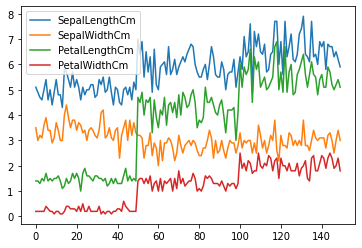

In [107]:
#Plotting Data without ID
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

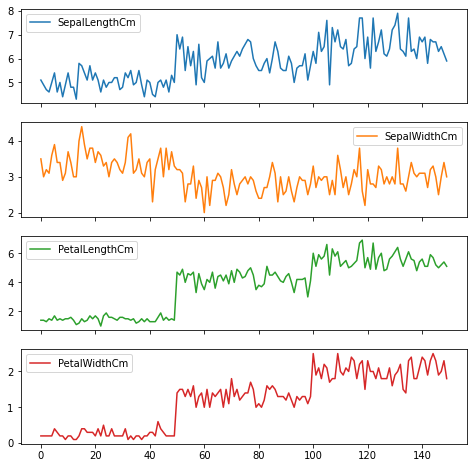

In [109]:
df.plot(subplots = True, figsize=(8,8))

<AxesSubplot:>

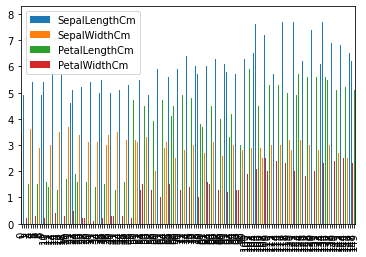

In [110]:
df.plot(kind='bar')